In [1]:
import sys
import time
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

stars = []

date = []

country = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)
  
  # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
        
    for para in parsed_content.find_all('span',attrs={'itemprop':'ratingValue'}):
        stars.append(para.get_text()) 
        
      
    for para in parsed_content.find_all('time',attrs={'itemprop':'datePublished'}):
        date.append(para.get_text())
        
    for para in parsed_content.find_all("h3"):
        country.append(para.span.next_sibling.text.strip(" ()"))

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10


In [3]:
stars=[ x for x in stars if "\t" not in x ]

In [4]:
data = pd.DataFrame()
data["reviews"] = reviews
data["stars"] = stars
data['date'] = date
data['country'] = country
data.head()

,reviews,stars,date,country
0,✅ Trip Verified | Obviously many airlines hav...,4,6th April 2023,United Kingdom
1,✅ Trip Verified | Lost 3 out of 4 checked bags...,1,6th April 2023,United States
2,✅ Trip Verified | I have flown with BA for ma...,3,5th April 2023,United Kingdom
3,✅ Trip Verified | Boarding at Mumbai was chaot...,9,31st March 2023,United Kingdom
4,"Not Verified | Mexico City Airport is a zoo, b...",10,30th March 2023,Netherlands


In [5]:
data.reviews = data.reviews.str.strip("✅ Trip Verified |, Not Verified |")

In [6]:
data.head()

,reviews,stars,date,country
0,Obviously many airlines have gone downhill in ...,4,6th April 2023,United Kingdom
1,Lost 3 out of 4 checked bags. Denied wheelchai...,1,6th April 2023,United States
2,I have flown with BA for many years and there ...,3,5th April 2023,United Kingdom
3,Boarding at Mumbai was chaotic and badly organ...,9,31st March 2023,United Kingdom
4,"Mexico City Airport is a zoo, but taking the ...",10,30th March 2023,Netherlands


In [7]:
import os
os.getcwd()

'C:\\Users\\dell'

In [8]:
data.to_csv('BA.csv')

In [9]:
# Importing required packages

In [10]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
# Import the data

In [12]:
df = pd.read_csv(r'C:\Users\dell\BA.csv')

In [13]:
df.head()

,Unnamed: 0,reviews,stars,date,country
0,0,Obviously many airlines have gone downhill in ...,4,6th April 2023,United Kingdom
1,1,Lost 3 out of 4 checked bags. Denied wheelchai...,1,6th April 2023,United States
2,2,I have flown with BA for many years and there ...,3,5th April 2023,United Kingdom
3,3,Boarding at Mumbai was chaotic and badly organ...,9,31st March 2023,United Kingdom
4,4,"Mexico City Airport is a zoo, but taking the ...",10,30th March 2023,Netherlands


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
 2   stars       1000 non-null   int64 
 3   date        1000 non-null   object
 4   country     1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [15]:
df.describe()

,Unnamed: 0,stars
count,1000.000000,1000.000000
mean,499.500000,4.404000
std,288.819436,3.311457
min,0.000000,1.000000
25%,249.750000,1.000000
50%,499.500000,3.000000
75%,749.250000,8.000000
max,999.000000,10.000000


In [16]:
df.dtypes

Unnamed: 0     int64
reviews       object
stars          int64
date          object
country       object
dtype: object

In [17]:
# Convert the data to date format

In [18]:
df.date = pd.to_datetime(df.date)

In [19]:
df.date.head()

0   2023-04-06
1   2023-04-06
2   2023-04-05
3   2023-03-31
4   2023-03-30
Name: date, dtype: datetime64[ns]

In [20]:
df.drop({"Unnamed: 0"}, axis="columns", inplace=True)

In [21]:
# Handling duplicates
# If the dataset has multiple entries of the same record then we can remove the duplicate entries. 

In [22]:
duplicate = df.duplicated()  # Returns Boolean Series denoting duplicate rows.

In [23]:
print(duplicate)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


In [24]:
# In our dataset we have no duplicate value. we will use function drop_duplicates() to remove duplicates.

In [25]:
# Missing Value Analysis

In [26]:
df.isnull().sum() # Check for missing values.

reviews    0
stars      0
date       0
country    0
dtype: int64

In [27]:
df.stars.unique()

array([ 4,  1,  3,  9, 10,  2,  8,  7,  6,  5], dtype=int64)

In [28]:
df.stars.value_counts()

1     311
2     112
10    103
3      99
8      81
9      80
7      61
4      60
5      51
6      42
Name: stars, dtype: int64

In [29]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Download the required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [30]:
# Perform sentiment analysis on this extracted data and build a unigram and bigram word cloud. 

In [31]:
# Convert df.reviews to string
df.reviews = df.reviews.astype(str)

In [32]:
# Tokenize sentences in each element of df.reviews column
df['sentences'] = df['reviews'].apply(nltk.sent_tokenize)

In [33]:
# Combine all reviews into a single string, separated by space
reviews_combined = ' '.join(df['reviews'])

In [34]:
# Print the combined reviews
print(reviews_combined)

Obviously many airlines have gone downhill in recent years. Prices have increased and services have gone down. The most disappointing thing about BA is that aspects that really don’t need to get worse have. The check in staff at Heathrow are downright rude and abusive, shouting at passengers to line here and there and rolling their eyes if passengers get confused with the constant shouting and bullying. Airlines are now competing globally more and more and this behaviour is particularly noticeable in Asia where the service industry is next level. I wouldn’t want to suggest that all the staff are like this and many younger employees are polite and helpful. However there were a couple of older staff that were downright rude and obnoxious. Lost 3 out of 4 checked bags. Denied wheelchair assistance at LHR for my wife and the staff forced us to change terminals by foot. Rude staff on BA297 from LHR to ORD on April 05, 2023: ignored multiple times when simply requested a cup of water. When w

In [35]:
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [36]:
# Perform sentiment analysis on each sentence in the reviews text
sentiments = [sia.polarity_scores(sentence) for sentence in nltk.sent_tokenize(reviews_combined)]

# Calculate the overall sentiment score
compound_score = sum([sentiment['compound'] for sentiment in sentiments]) / len(sentiments)

# Print the overall sentiment score
print(f"Overall sentiment score: {compound_score}")

Overall sentiment score: 0.04362686123348035


In [37]:
# Create a WordCloud object with desired parameters
wordcloud = WordCloud(width=800, height=400, max_words=500, background_color='white').generate(reviews_combined)

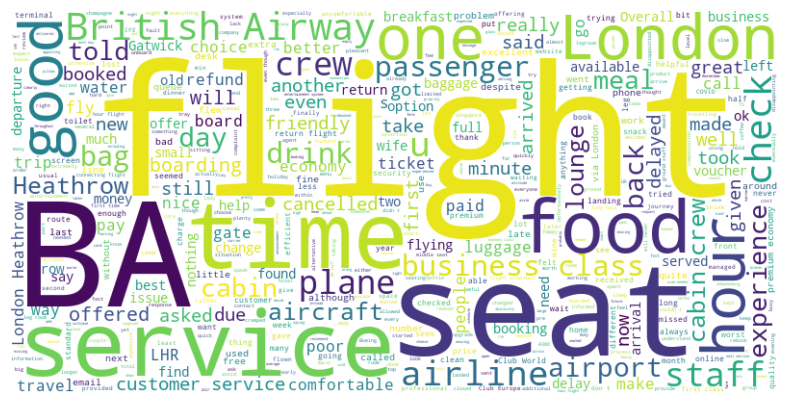

In [38]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()